In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import simulate
import seaborn as sns
import calculate_return as cr
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')

Fetching data

In [2]:
Y60 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=60)
Y50 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=50)
Y40 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=40)
Y30 = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000), YEARS=30)

Combining data

In [43]:
#formatere grundet forskellig længde
Y60D=Y60[["dual_phase"]].rename(columns={'dual_phase':'60 Years'}).loc[(slice(None), '2080-01-01'),:].reset_index()
Y60D=Y60D.drop(['period'], axis=1).set_index('random_state')

Y50D=Y50[["dual_phase"]].rename(columns={'dual_phase':'50 Years'}).loc[(slice(None), '2070-01-01'),:].reset_index()
Y50D=Y50D.drop(['period'], axis=1).set_index('random_state')

Y40D=Y40[["dual_phase"]].rename(columns={'dual_phase':'40 Years'}).loc[(slice(None), '2060-01-01'),:].reset_index()
Y40D=Y40D.drop(['period'], axis=1).set_index('random_state')

Y30D=Y30[["dual_phase"]].rename(columns={'dual_phase':'30 Years'}).loc[(slice(None), '2050-01-01'),:].reset_index()
Y30D=Y30D.drop(['period'], axis=1).set_index('random_state')

#Samler
Data=Y60D
Data["50 Years"]=Y50D["50 Years"]
Data["40 Years"]=Y40D["40 Years"]
Data["30 Years"]=Y30D["30 Years"]

In [ ]:
Plotting figure

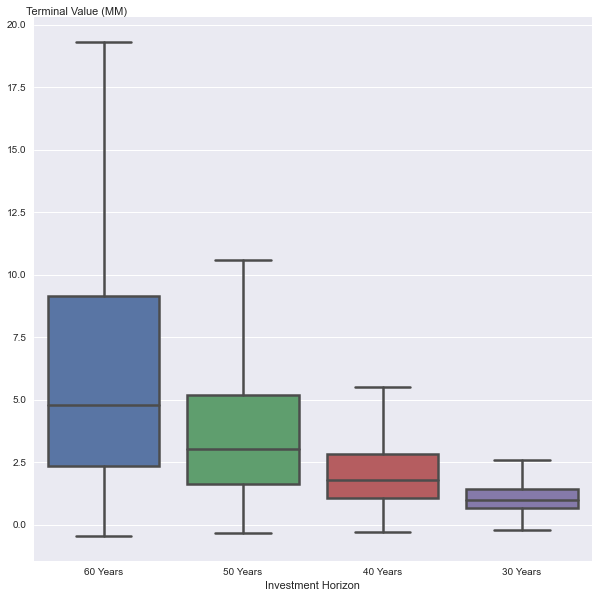

In [48]:
x = pd.melt(Data)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("Terminal Value (MM)", rotation=0, loc='top', labelpad=-120)
plt.xlabel("Investment Horizon")
plt.ticklabel_format(style='plain', axis='y',useOffset=True, )
plt.savefig("Robustness/boxplot_INV_HOR.png", bbox_inches = 'tight', pad_inches = 0.1)

In [14]:
Data

,,60 Years
random_state,period,
0,2080-01-01,1257458.555
1,2080-01-01,13961778.487
2,2080-01-01,555262.027
3,2080-01-01,5891343.203
4,2080-01-01,9530696.814
...,...,...
9995,2080-01-01,5105734.297
9996,2080-01-01,2843314.088
9997,2080-01-01,5540063.084
